* <font color=blue> Well done. Comments and marks are in blue text throughout.</font>
* <font color=blue> Each question is worth 15 marks and there are 10 marks for clarity and presentation.</font>
* <font color=blue> I gave you 5/10 for clarity and presentation. Some of your plots were confusingly labelled (see my comments in the text) and many of them would have been more appropriately plotted on log axes. It would also help to plot the data points as well as the lines joining them. Your supporting explanations and code are very clear and concise. </font>

<font color=blue>
Total mark: 15+13+12+12+15+15+5 = 87/100
</font>

In [12]:
15+13+12+12+15+15+5

87

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [3]:
using PyPlot

1.,2.& 6.: Plotting first 80 terms of $a_n$ using Float32, Float64 and BigFloat

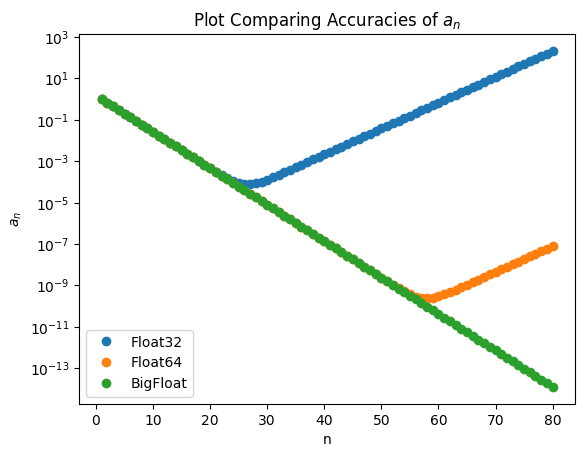

PyObject <matplotlib.legend.Legend object at 0x12af496d0>

In [4]:

a_1=Float32(1)
a_2=Float32(2)/Float32(3)

x=1:80
y=convert(Vector{Float32},zeros(80))

y[1]=a_1
y[2]=a_2


for i=1:78
    a=Float32(2)*a_2-Float32(8)/Float32(9)*a_1
    y[i+2]=a
    a_1=a_2
    a_2=a
end

semilogy(x,y,"o",label="Float32")

a_1=1
a_2=2/3

y=zeros(80)

y[1]=a_1
y[2]=a_2

for i=1:78
    a=2*a_2-8/9*a_1
    y[i+2]=a
    a_1=a_2
    a_2=a
end

semilogy(x,y,"o",label="Float64")


a_1=BigFloat(1)
a_2=BigFloat(2)/BigFloat(3)

y=convert(Vector{BigFloat},zeros(80))

y[1]=a_1
y[2]=a_2

for i=1:78
    a=BigFloat(2)*a_2-BigFloat(8)/BigFloat(9)*a_1
    y[i+2]=a
    a_1=a_2
    a_2=a
end

semilogy(x,Array{Float64}(y),"o",label="BigFloat")
xlabel("n")
ylabel(L"a_n")
title("Plot Comparing Accuracies of "L"a_n")

legend()


********************************************************



<br/>

3.

General solution of $a_{n+1}=2a_n-\frac{8}{9}a_{n-1}$ 

Ansatz $a_n=x^n$ $\Rightarrow$ 

$x^{n+1}=2x^n-\frac{8}{9}x^{n-1}$ $\Rightarrow$ 

$x^{n+1}-2x^n+\frac{8}{9}x^{n-1}=0$ $\Rightarrow$ 

$x^{n-1}(x^2-2x+\frac{8}{9})=0$ $\Rightarrow$ 

$x=0$ or $x_{1,2}=\frac{ 2 \pm \sqrt{ \strut 4-\frac{32}{9}}}{2} = \frac{2 \pm \sqrt{\frac{4}{9}}}{2} = 1 \pm \frac{1}{3}$

General solution is $a_n=C_1x_{1}^n+C_2x_{2}^{n}=C_1(\frac{4}{3})^n+C_2(\frac{2}{3})^n$

4.

With initial conditions $a_1=1$, $a_2=\frac{2}{3}$:


$a_1 = \frac{4}{3}C_1+\frac{2}{3}C_2=1$


$a_2=(\frac{4}{3})^2C_1+(\frac{2}{3})^2C_2=1$



or 

$\begin{pmatrix} \frac{4}{3} & \frac{2}{3} \\ \frac{16}{9} & \frac{4}{9} \end{pmatrix}
\begin{pmatrix}C_1 \\ C_2 \end{pmatrix} = \begin{pmatrix} 1 \\ \frac{2}{3} \end{pmatrix}$.

Let $A=\begin{pmatrix} \frac{4}{3} & \frac{2}{3} \\ \frac{16}{9} & \frac{4}{9} \end{pmatrix}$,
then $A^{-1}=\begin{pmatrix} -\frac{3}{4} & \frac{9}{8} \\ 3 & -\frac{9}{4} \end{pmatrix}$ and so

$\begin{pmatrix}C_1 \\ C_2 \end{pmatrix} = A^{-1} \begin{pmatrix} 1 \\ \frac{2}{3} \end{pmatrix}
=\begin{pmatrix} 0 \\ \frac{3}{2} \end{pmatrix}$.

So for the initial conditions $a_1=1$, $a_2=\frac{2}{3}$ we have the solution 
$a_n=\frac{3}{2}(\frac{2}{3})^n$.

5.

Perturbed initial conditions $a_1=1$, $a_2=\frac{2}{3}+\epsilon$. Then


$a_1 = \frac{4}{3}C_1+\frac{2}{3}C_2=1$


$a_2=(\frac{4}{3})^2C_1+(\frac{2}{3})^2C_2=\frac{2}{3}+\epsilon$

or 

$A \begin{pmatrix}C_1 \\ C_2 \end{pmatrix} = \begin{pmatrix} 1 \\ \frac{2}{3}+\epsilon \end{pmatrix}$ with $A$ as above.

Then 

$\begin{pmatrix}C_1 \\ C_2 \end{pmatrix} = A^{-1} \begin{pmatrix} 1 \\ \frac{2}{3} + \epsilon \end{pmatrix}
=\begin{pmatrix} \frac{9}{8} \epsilon \\ \frac{3}{2}-\frac{9}{4}\epsilon \end{pmatrix}$.

Therefore we have solution

$a_n=\frac{9}{8}\epsilon(\frac{4}{3})^n+(\frac{3}{2}-\frac{9}{4}\epsilon)(\frac{2}{3})^n=
\frac{3}{2}(\frac{2}{3})^n+\epsilon(\frac{9}{8}(\frac{4}{3})^n-\frac{9}{4}(\frac{2}{3})^n)$.

$\epsilon$ can be viewed as the error the computer makes when calculating the initial condition $a_2=\frac{2}{3}$. This error will decrease from Float32 to Float64 to BigFloat as the approximation becomes better. The error changes the solution which explains why in the graph above the $a_n$ start to increase in Float32 and Float64 after a certain $n$ when the $\epsilon$ term starts to take over. 

<font color=blue>
15/15 Good answer. The BigFloat would eventually deviate from the exact solution too but you would have to go 
to larger values of n to see that.
</font>

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:

In [6]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

*************************************************************


1. Verify mergepresorted function works with some examples:

In [7]:
include("functions1.jl")

mergeSort (generic function with 1 method)

In [8]:
A=[1, 2, 3]
B=[2, 3, 4, 5]

C=[6,9,11,48,71]
D=[-9,-4,18]

println(mergepresorted(A,B))
println(mergepresorted(C,D))

[1, 2, 2, 3, 3, 4, 5]
[-9, -4, 6, 9, 11, 18, 48, 71]


2.
Verify mergeSort function works with some examples:

In [9]:
n=3
N=2^n

x=rand(1:2^n,N)

println("x = ",x)

println("x sorted: ", mergeSort(x))

y=rand(-4:4,N)

println("y = ",y)

println("y sorted: ", mergeSort(y))

x = [1, 1, 7, 3, 2, 7, 4, 7]
x sorted: [1, 1, 2, 3, 4, 7, 7, 7]
y = [2, 0, 2, -2, 2, 0, 3, -1]
y sorted: [-2, -1, 0, 0, 2, 2, 2, 3]


 3.
 The computational complexity of sorting vector of one number is 1 so $F(1)=1$.
 
 The mergesort algorithm splits a vector of size $n$ into two vectors of size $\frac{n}{2}$ and then mergepresorts these two vectors which has a computational cost of $\frac{n}{2}+\frac{n}{2}=n$ therefore
 $F(n)=2F(\frac{n}{2})+n$.
 
 4.
 Let $n=2^p$, $b_p=2^p$ then $b_p=2F(2^{p-1})+2^p=2b_{p-1}+2^p$ , $b_0=F(1)=1$.
 
 5.
 Homogeneous equation: $b_p=2b_{p-1}$. Ansatz $b_p=x^p$. So $x^p=2x^{p-1}$ $\Rightarrow x=0,2$. 
 
 General solution then given by $b_p=C2^p$ for some constant $C$.
 
 6.
 Particular solution of $b_p=2b_{p-1}+2^p$.
 
 Ansatz $b_p=A(2^p)^2+Bp2^p+C$. Substituting into above equation gives:
 
 \begin{align}
 A(2^p)^2+Bp2^p+C&=2(A(2^{p-1})^2+B(p-1)2^{p-1}+C)+2^p \\
 &= \frac{A}{2}(2^p)^2+(B(p-1)+1)2^p+2C
 \end{align}
 
 Therefore $A=\frac{A}{2}, Bp=B(p-1)+1, C=2C$ and so $A=C=0$, $B=1$.
 
 This implies the particular solution is $b_p=p2^p$ and so the general solution is $b_p=(C+p)2^p$. 
 
 $b_0=C=1 \Rightarrow b_p = (1+p)2^p$ is the solution with the initial condition $b_0$.
 
 7.
 $n=2^p \Rightarrow p=\frac{log(n)}{log(2)}$.
 
 Substituting $F(n)=b_p$ into the solution gives $F(n)=(1+\frac{log(n)}{log(2)})n$ 
 $\Rightarrow F(n)=O(nlog(n))$.
 
<font color=blue>
Well done - you have got all the steps correct here.
</font>
 
 8.
 
 



In [10]:
x=zeros(15)
y=zeros(15)
z=zeros(15)

for i=1:15
    x[i]=2^i
    x1=rand(1:2^i,2^i)
    #println(@timed(mergeSort(x))[2])
    y[i]=@timed(mergeSort(x1))[2]
    z[i]=(2^i*log(2^i))/(2^16-2)
    #println(z[i])
end



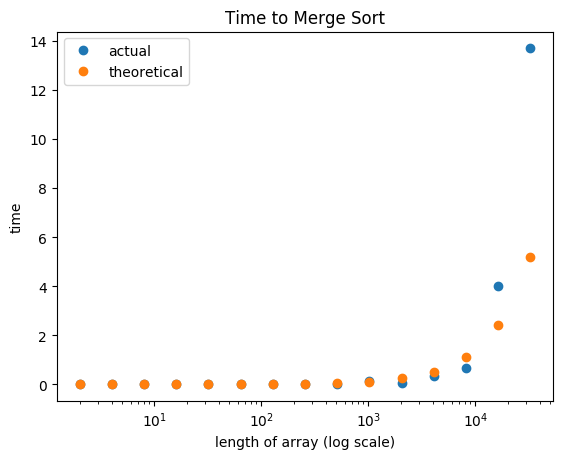

PyObject <matplotlib.legend.Legend object at 0x12afe1050>

In [11]:

#plot(x,y,"o",label="actual")
#plot(x,z,"o",label="theoretical")
semilogx(x,y,"o",label="actual")
semilogx(x,z,"o",label="theoretical")
ylabel("time")
xlabel("length of array (log scale)")
title("Time to Merge Sort")
legend()


<font color=blue>
This is not the best plot since it does not really show what is happening fopr the smaller values of $n$. It
would probably work better if you also used a log scale for the y axis. You usually want to create plots that
contain approximatelt straight lines.
</font>

<font color=blue>
13/15 : Good answer.
</font>